In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import patches as ptc 
import math
import random
from tensorflow.keras.utils import plot_model

from PIL import Image
import os



In this section you can experiment with whatever ConvNet architecture you'd like on CIFAR-10.

You should experiment with architectures, hyperparameters, loss functions, or anything else you can think of to train a model that achieves **at least 70%** accuracy on the **Test** set within 30 epochs.

In [3]:
(x_train0, y_train0), (x_test0, y_test0) = tf.keras.datasets.cifar10.load_data()
x_train = x_train0.reshape(50000, 32, 32, 3).astype("float32") / 255.0
x_test = x_test0.reshape(10000, 32, 32, 3).astype("float32") / 255.0
y_train = np.asarray(y_train0, dtype=np.int32)
y_test = np.asarray(y_test0, dtype=np.int32)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


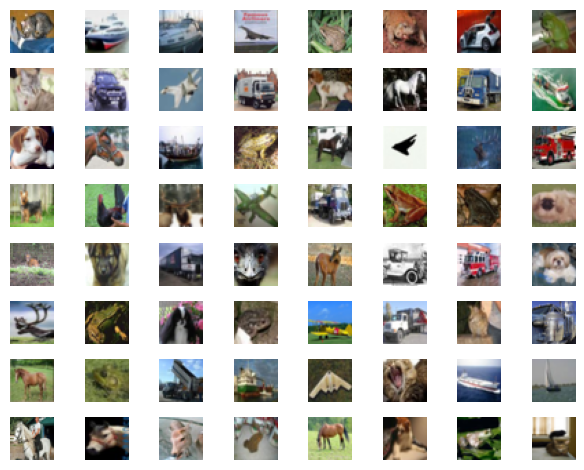

In [4]:
for i, img in enumerate(x_test0[0:64]):
    plt.subplot(8, 8, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    #prediction = model.predict(x_test[i:i+1])
    #pred_label = np.argmax(prediction)
    
   
    plt.tight_layout()

In [6]:
def MyNet():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    # you can modify the optimizer as needed
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

  

In [7]:
model = MyNet()
training_history = model.fit(x_train, y_train, epochs=30)

c:\Users\sumba\anaconda3\envs\Tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.3094 - loss: 1.8292
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4413 - loss: 1.4968
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.5472 - loss: 1.2698
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.6065 - loss: 1.1252
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.6380 - loss: 1.0371
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6638 - loss: 0.9712
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.6864 - loss: 0.9141
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7039 - loss: 0.8587
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7163 - loss: 0.8264
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7262 - loss: 0.7965
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7369 - loss: 0.7687
Epoch 1

In the cell below:  

1) Plot the network diagram
2) Write an explanation of what you did
3) Plot the loss and accuracy graph over epoches
4) Report accuracy on Test dataset. 

313/313 - 4s - 12ms/step - accuracy: 0.8063 - loss: 0.6136
Test Accuracy: 80.63%


KeyError: 'val_accuracy'

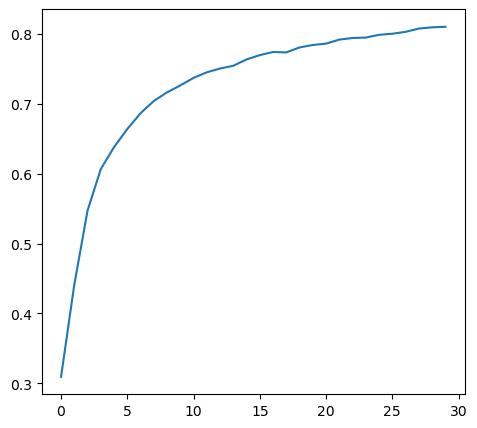

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(training_history.history['accuracy'], label='Train Acc')
plt.plot(training_history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()